In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('..\\datasets\\Credit-Score-Data\\train.csv')

In [3]:
data.info()#check columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [4]:
data.isnull().any() # check if there is any null value

ID                          False
Customer_ID                 False
Month                       False
Name                        False
Age                         False
SSN                         False
Occupation                  False
Annual_Income               False
Monthly_Inhand_Salary       False
Num_Bank_Accounts           False
Num_Credit_Card             False
Interest_Rate               False
Num_of_Loan                 False
Type_of_Loan                False
Delay_from_due_date         False
Num_of_Delayed_Payment      False
Changed_Credit_Limit        False
Num_Credit_Inquiries        False
Credit_Mix                  False
Outstanding_Debt            False
Credit_Utilization_Ratio    False
Credit_History_Age          False
Payment_of_Min_Amount       False
Total_EMI_per_month         False
Amount_invested_monthly     False
Payment_Behaviour           False
Monthly_Balance             False
Credit_Score                False
dtype: bool

In [5]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

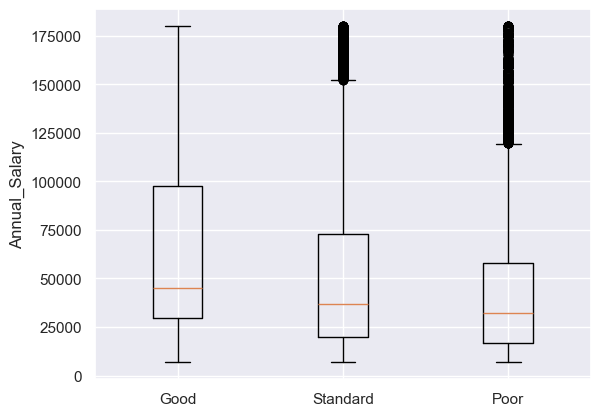

In [15]:
fig,ax=plt.subplots()
ax.boxplot([data[data['Credit_Score']=='Good']['Annual_Income'],
             data[data['Credit_Score']=='Standard']['Annual_Income'],
             data[data['Credit_Score']=='Poor']['Annual_Income']],
            labels=['Good','Standard','Poor']
           )
ax.set_ylabel('Annual_Salary')
plt.show()

In [7]:
data['Credit_Mix']=data['Credit_Mix'].map({'Standard':1,'Good':2,'Bad':0})

In [8]:
from sklearn.model_selection import train_test_split
x = np.array(data[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])
y = np.array(data[["Credit_Score"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [9]:
ypred=model.predict(xtest)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
accuracy_score(ypred,ytest)

0.807030303030303

In [16]:
confusion_matrix(ypred,ytest)

array([[ 4473,    33,  1284],
       [   31,  7964,  2022],
       [ 1362,  1636, 14195]], dtype=int64)

In [19]:
model.score(xtest,ytest)

0.807030303030303

Steps Involved in Random Forest Algorithm

Step 1: In the Random forest model, a subset of data points and a subset of features is selected for constructing each decision tree. Simply put, n random records and m features are taken from the data set having k number of records.

Step 2: Individual decision trees are constructed for each sample.

Step 3: Each decision tree will generate an output.

Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression, respectively.